Задание 6. Описательная статистика

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 4.  

Шаг 2. Выполните описательный анализ признаков предложенного датасета (Алгоритм выполнения представлен в практическом занятии по теме 4.1):

2.1 Загрузите датасет;

2.2 Разделите признаки на две группы: категориальные и непрерывные;

2.3 Для каждого из категориальных признаков: 
- рассчитайте моду; 
- постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем);
- на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;   

2.4 Для каждого из непрерывных признаков:
- рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов; 
- постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой; 
- постройте плотность распределения и гистограмму;
- объедините на одном графике плотность распределения и вертикальные линии статистик.

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin

**Описание данных**

Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`estimated_salary`|заработная плата клиента|

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as st
plt.style.use('tableau-colorblind10')
df=pd.read_csv('task_6_bank_dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            1000 non-null   int64  
 1   score             1000 non-null   int64  
 2   Gender            1000 non-null   object 
 3   Age               1000 non-null   int64  
 4   Objects           1000 non-null   int64  
 5   Balance           620 non-null    float64
 6   Products          1000 non-null   int64  
 7   estimated_salary  1000 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [3]:
df.head(10)

,userid,score,Gender,Age,Objects,Balance,Products,estimated_salary
0,15821574,783,М,38,9,114135.17,1,153269.98
1,15677342,634,М,52,1,NaN,2,176913.42
2,15771974,631,М,48,1,106396.48,1,150661.42
3,15703602,640,Ж,29,3,NaN,2,2743.69
4,15632379,684,Ж,41,7,NaN,1,138394.37
5,15855364,453,Ж,38,8,120623.21,1,129697.99
6,15846073,648,М,23,9,168372.52,1,134676.72
7,15739865,706,Ж,43,1,NaN,2,31962.77
8,15723347,663,М,67,9,NaN,3,72318.77
9,15612331,678,Ж,50,6,NaN,1,8199.50


In [5]:
df.columns=df.columns.str.lower()
df.columns
kat_var=['gender','objects','products']
int_var=['score','age','balance','estimated_salary']
dict_rus_name={'gender':'Пол','objects':'Кол-во объектов','products':'Кол-во продуктов','score':'Баллы кред скоринга', 'age':'Возраст','balance':'Баланс','estimated_salary':'ЗП'}

In [6]:
df[kat_var].mode()

,gender,objects,products
0,М,1,1


C:\Users\Алексей\AppData\Local\Temp\ipykernel_6852\2345512443.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i+1)


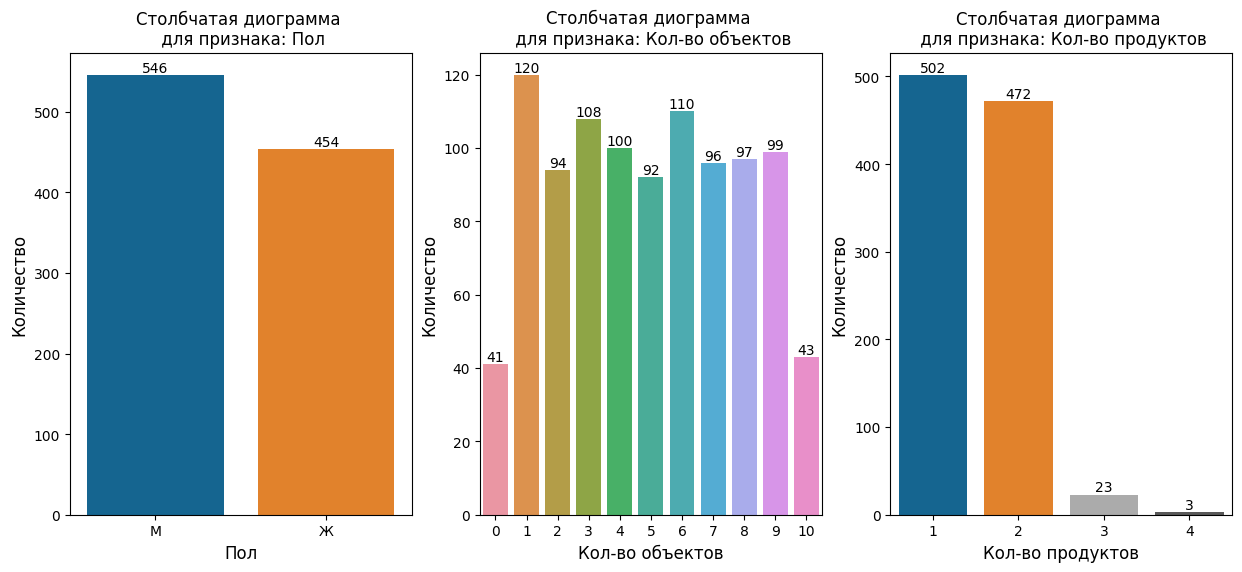

In [7]:
'''В данном случае subplots не обязателен можно было сделать через цикл, но тогда графики вывелись бы вертикально 
и читать их было бы не удобно
'''

fig, axes = plt.subplots(1, sharey=True, figsize=(15,6)) 
i=0
for i, col in enumerate(kat_var):
    plt.subplot(1,3,i+1)
    splot=sns.countplot(x=col, data=df,)
    plt.title(f'Столбчатая диограмма \n для признака: {dict_rus_name[col]}')
    plt.xlabel(dict_rus_name[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    splot.bar_label(splot.containers[0])

In [8]:
df[int_var].describe()

,score,age,balance,estimated_salary
count,1000.000000,1000.000000,620.000000,1000.000000
mean,646.850000,38.937000,120237.070629,98511.618670
std,95.818624,10.567246,30222.080785,59505.756571
min,414.000000,18.000000,24043.450000,287.990000
25%,579.000000,32.000000,101698.272500,44006.592500
50%,645.000000,37.000000,121317.795000,100410.425000
75%,714.000000,44.000000,138121.637500,149717.297500
max,850.000000,82.000000,216109.880000,199753.970000


In [9]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов. 
    На вход подается столбец датафрейма, 
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус  
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival 

In [10]:
for col in int_var:
    value_low, value_upper = calc_boxplot(df[col]) 
    print(f'Для признака {col}: нижний ус -- {value_low}; верхний ус -- {value_upper}.')
    print(f'Для признака {col}: квантилия 0.01:{np.percentile(df[col].dropna().round(), 1)}; квантилия 0.05:{np.percentile(df[col].dropna().round(), 5)}; квантилия 0.95:{np.percentile(df[col].dropna().round(), 95)};квантилия 0.99:{np.percentile(df[col].dropna().round(), 99)}')
    print(f'Для признака {col}: Выборочное среднее:{np.mean(df[col].dropna().round())}; Медиана:{np.median(df[col].dropna().round())}; Мода:{st.mode(df[col].dropna())}')

Для признака score: нижний ус -- 414; верхний ус -- 850.
Для признака score: квантилия 0.01:437.0; квантилия 0.05:489.9; квантилия 0.95:809.0;квантилия 0.99:850.0
Для признака score: Выборочное среднее:646.85; Медиана:645.0; Мода:850
Для признака age: нижний ус -- 18; верхний ус -- 62.
Для признака age: квантилия 0.01:21.0; квантилия 0.05:25.0; квантилия 0.95:61.0;квантилия 0.99:72.0
Для признака age: Выборочное среднее:38.937; Медиана:37.0; Мода:40
Для признака balance: нижний ус -- 49508.79; верхний ус -- 191808.73.
Для признака balance: квантилия 0.01:51744.26; квантилия 0.05:65701.1; квантилия 0.95:170262.94999999998;квантилия 0.99:187356.51999999996
Для признака balance: Выборочное среднее:120237.06451612903; Медиана:121317.5; Мода:114135.17
Для признака estimated_salary: нижний ус -- 287.99; верхний ус -- 199753.97.
Для признака estimated_salary: квантилия 0.01:2242.08; квантилия 0.05:8535.45; квантилия 0.95:191556.55;квантилия 0.99:198258.87
Для признака estimated_salary: Выборо

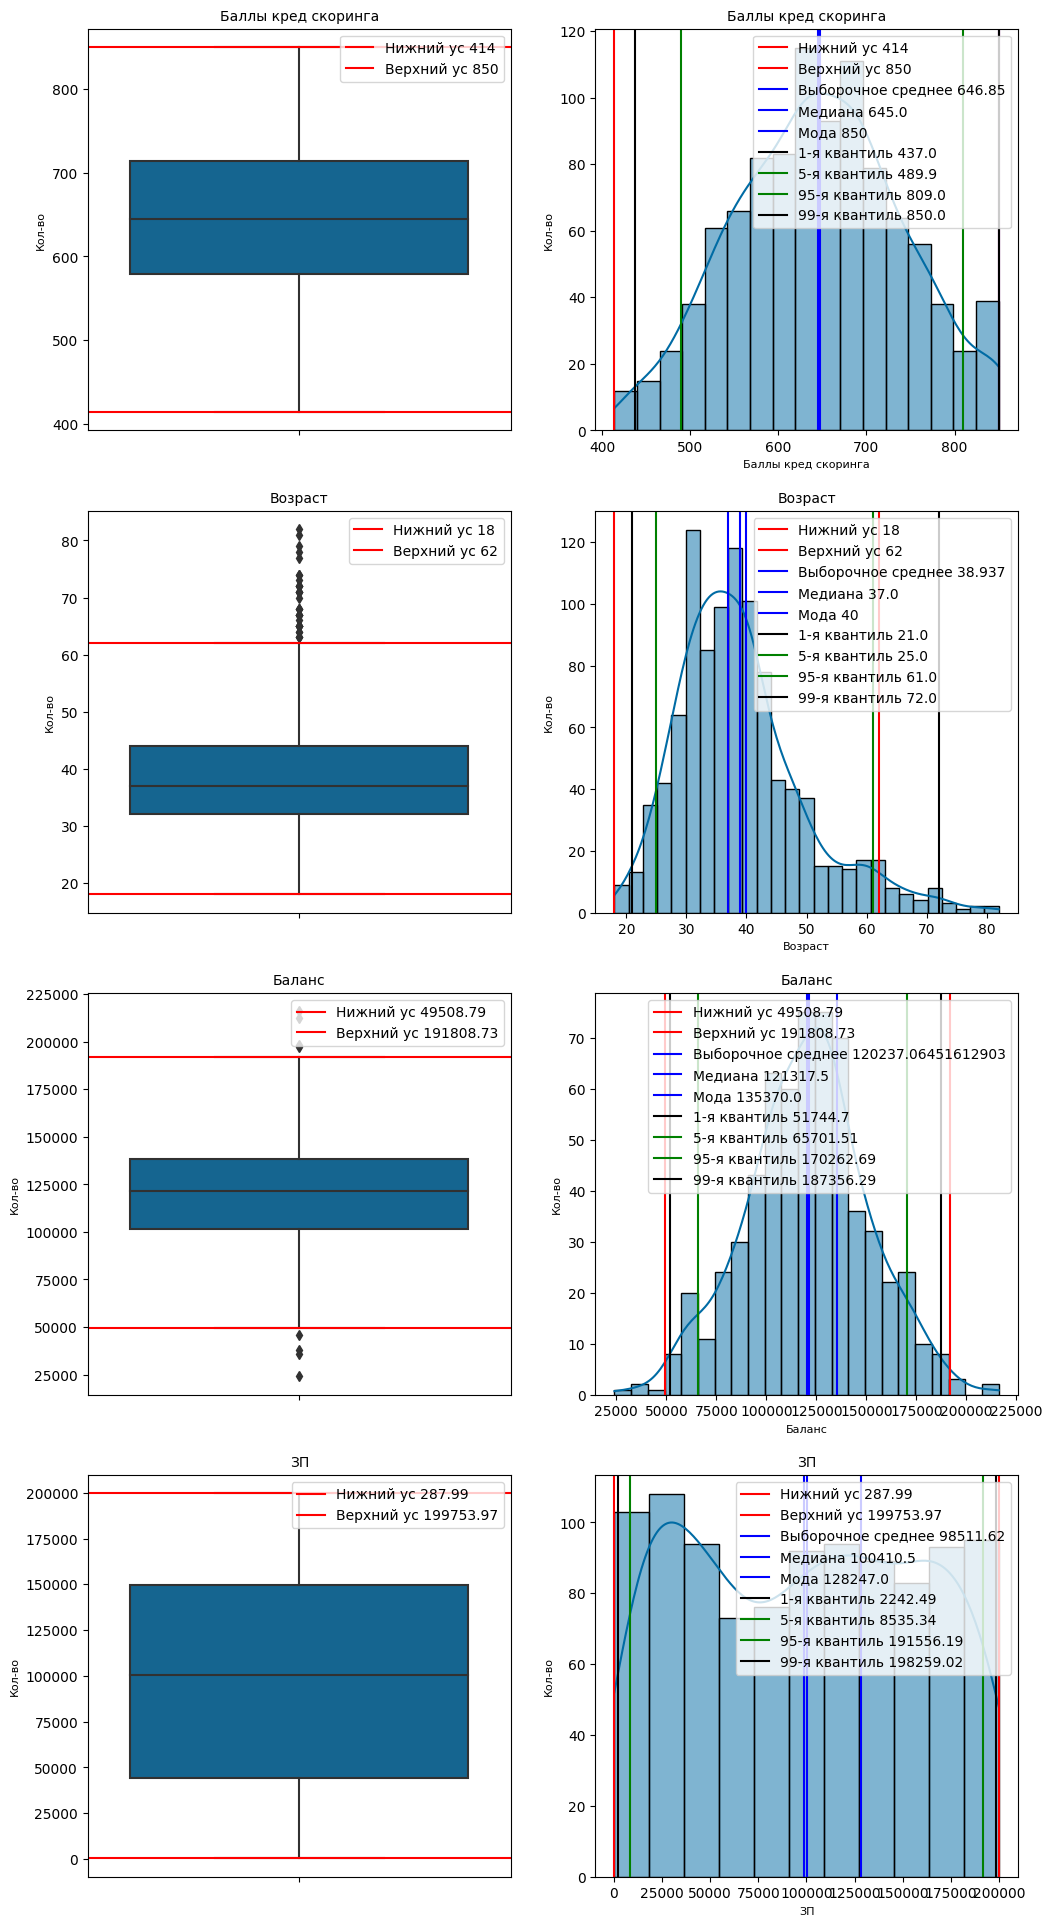

In [11]:
fig, ax = plt.subplots(4, 2, figsize = (12, 24)) 

for index, col in enumerate(int_var):   
    plt.subplot(4, 2, 2*index + 1) 
    ax = sns.boxplot(y = df[col]) 
    plt.title(f'{dict_rus_name[col]}', fontsize = 10) 
    plt.ylabel('Кол-во', fontsize = 8) 
    value_low, value_upper = calc_boxplot(df[col])
    plt.axhline(value_low, 
                color = 'red',
                label = f'Нижний ус {np.round(value_low,2)}'
                )
    plt.axhline(value_upper, 
                color = 'red', 
                label = f'Верхний ус {np.round(value_upper,2)}'
               )
    plt.legend(loc='upper right') 
   
    plt.subplot(4, 2, 2*index + 2)
    ax = sns.histplot(df[col], 
                      kde = True 
                      ) 
    value_low, value_upper = calc_boxplot(df[col])
    plt.axvline(value_low, 
                color = 'red',
                label = f'Нижний ус {np.round(value_low,2)}'
                )
    plt.axvline(value_upper, 
                color = 'red', 
                label = f'Верхний ус {np.round(value_upper,2)}'
                )
    plt.legend(loc='upper right') 
    per_1 = np.percentile(df[col].dropna(), 1)
    per_5 = np.percentile(df[col].dropna(), 5)
    per_95 = np.percentile(df[col].dropna(), 95)
    per_99 = np.percentile(df[col].dropna(), 99)
    mean = np.mean(df[col].dropna().round())
    med = np.median(df[col].dropna().round())
    mod = st.mode(df[col].dropna().round())
    plt.axvline(mean, 
                color = 'blue', 
                label = f'Выборочное среднее {mean}' 
                )
    plt.axvline(med, 
                color = 'blue', 
                label = f'Медиана {med}' 
                )
    plt.axvline(mod, 
                color = 'blue', 
                label = f'Мода {mod}' 
                )
    plt.axvline(per_1, 
                color = 'black', 
                label = f'1-я квантиль {np.round(per_1,2)}' 
                )
    plt.axvline(per_5,
                color = 'green', 
                label = f'5-я квантиль {np.round(per_5,2)}'
                )
    plt.axvline(per_95, 
                color = 'green', 
                label = f'95-я квантиль {np.round(per_95,2)}'
                )
    plt.axvline(per_99,
                color = 'black', 
                label = f'99-я квантиль {np.round(per_99,2)}'
                )
    plt.legend(loc='upper right') 
    plt.title(f'{dict_rus_name[col]}', fontsize = 10) 
    plt.ylabel('Кол-во', fontsize = 8) 
    plt.xlabel(f'{dict_rus_name[col]}', fontsize = 8) 
